### 실습 전 설정

In [100]:
#실습전 설정

import sys
assert sys.version_info >= (3,5)

import sklearn 
assert sklearn.__version__ >= "0.20"

import numpy as np
import os

np.random.seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

PROJECT_ROOT_DIR ="."
CHAPTER_ID="ensembles"
IMAGES_PATH=os.path.join(PROJECT_ROOT_DIR, 'images', CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path=os.path.join(IMAGES_PATH, fig_id+"."+fig_extension)
    print("그림저장: ", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    

### 큰 수의 법칙

In [101]:
heads_proba=0.51
coin_tosses = (np.random.rand(10000, 10) < heads_proba).astype(np.int32)
cumulative_heads_ratio = np.cumsum(coin_tosses, axis=0) / np.arange(1, 10001).reshape(-1, 1)

그림저장:  law_of_large_numbers_plot


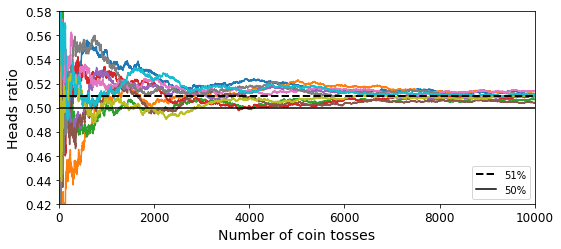

In [102]:
plt.figure(figsize=(8,3.5))
plt.plot(cumulative_heads_ratio) 
plt.plot([0,10000], [0.51,0.51], "k--", linewidth=2, label="51%") 
plt.plot([0,10000], [0.5,0.5], "k-", label="50%") 
plt.xlabel("Number of coin tosses") 
plt.ylabel("Heads ratio") 
plt.legend(loc="lower right") 
plt.axis([0,10000,0.42,0.58]) 
save_fig("law_of_large_numbers_plot") 
plt.show()

### 직접 투표 분류기
#### voting = 'hard'

In [191]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [195]:
X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_clf = LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(random_state=42)
svm_clf = SVC(random_state=42)

voting_clf = VotingClassifier(
    estimators = [('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard'
)
voting_clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.896
SVC 0.896
VotingClassifier 0.912


### 간접 투표 분류기
#### voting = 'soft'

In [196]:
X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_clf = LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(random_state=42)
svm_clf = SVC(probability = True, random_state=42)

voting_clf = VotingClassifier(
    estimators = [('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='soft'
)

voting_clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.896
SVC 0.896
VotingClassifier 0.92


## PG#3 EnsembleLearning

### 간접 투표방식으로 여러 조합의 앙상블 학습


- LogisticRegression    O  
- Random Forest tree    O (estimators 설정 안함)  
- SVM   O

In [211]:
X, y = make_moons(n_samples=1000, noise=0.40, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_clf = LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(random_state=42)
svm_clf = SVC(probability = True, random_state=42)

voting_clf = VotingClassifier(
    estimators = [('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='soft'
)

voting_clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.836
RandomForestClassifier 0.872
SVC 0.86
VotingClassifier 0.86


- LogisticRegression    O  
- Random Forest tree    O (estimators = 50)  
- SVM   O

In [212]:
X, y = make_moons(n_samples=1000, noise=0.40, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_clf = LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(n_estimators = 50, random_state=42)
svm_clf = SVC(probability = True, random_state=42)

voting_clf = VotingClassifier(
    estimators = [('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='soft'
)

voting_clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.836
RandomForestClassifier 0.868
SVC 0.86
VotingClassifier 0.864


- LogisticRegression    O  
- Random Forest tree    O (estimators = 100)  
- SVM   O

In [213]:
X, y = make_moons(n_samples=1000, noise=0.40, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_clf = LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(n_estimators = 100, random_state=42)
svm_clf = SVC(probability = True, random_state=42)

voting_clf = VotingClassifier(
    estimators = [('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='soft'
)

voting_clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.836
RandomForestClassifier 0.872
SVC 0.86
VotingClassifier 0.86


- LogisticRegression    O  
- Random Forest tree    O (estimators = 200)  
- SVM   O

In [214]:
X, y = make_moons(n_samples=1000, noise=0.40, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_clf = LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(n_estimators = 200, random_state=42)
svm_clf = SVC(probability = True, random_state=42)

voting_clf = VotingClassifier(
    estimators = [('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='soft'
)

voting_clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.836
RandomForestClassifier 0.872
SVC 0.86
VotingClassifier 0.868


- LogisticRegression    O  
- Random Forest tree    O (estimators 설정안함)  
- SVM   X

In [215]:
X, y = make_moons(n_samples=1000, noise=0.40, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_clf = LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(random_state=42)

voting_clf = VotingClassifier(
    estimators = [('lr', log_clf), ('rf', rnd_clf)],
    voting='soft'
)

voting_clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.836
RandomForestClassifier 0.872
VotingClassifier 0.868


- LogisticRegression    O  
- Random Forest tree    O (estimators = 50)  
- SVM   X

In [216]:
X, y = make_moons(n_samples=1000, noise=0.40, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_clf = LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(n_estimators = 50, random_state=42)

voting_clf = VotingClassifier(
    estimators = [('lr', log_clf), ('rf', rnd_clf)],
    voting='soft'
)

voting_clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.836
RandomForestClassifier 0.868
VotingClassifier 0.864


- LogisticRegression    O  
- Random Forest tree    O (estimators = 100)  
- SVM   X

In [217]:
X, y = make_moons(n_samples=1000, noise=0.40, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_clf = LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(n_estimators = 100, random_state=42)

voting_clf = VotingClassifier(
    estimators = [('lr', log_clf), ('rf', rnd_clf)],
    voting='soft'
)

voting_clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.836
RandomForestClassifier 0.872
VotingClassifier 0.868


- LogisticRegression    O  
- Random Forest tree    O (estimators = 200)  
- SVM   X

In [218]:
X, y = make_moons(n_samples=1000, noise=0.40, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_clf = LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(n_estimators = 200, random_state=42)

voting_clf = VotingClassifier(
    estimators = [('lr', log_clf), ('rf', rnd_clf)],
    voting='soft'
)

voting_clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.836
RandomForestClassifier 0.872
VotingClassifier 0.868


- LogisticRegression    O  
- LogisticRegression    O   회기 하나 추가
- Random Forest tree    O (estimators = 200)  
- SVM   X

In [232]:
X, y = make_moons(n_samples=1000, noise=0.40, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_clf = LogisticRegression(random_state=42)
log_clf_1 = LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(n_estimators = 200, random_state=42)

voting_clf = VotingClassifier(
    estimators = [('lr', log_clf),('lr_1', log_clf_1), ('rf', rnd_clf)],
    voting='soft'
)

voting_clf.fit(X_train, y_train)


for clf in (log_clf, log_clf_1, rnd_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.836
LogisticRegression 0.836
RandomForestClassifier 0.872
VotingClassifier 0.86


- LogisticRegression    O  
- Random Forest tree    O (estimators = 200)  
- Random Forest tree    O (estimators = 200)  랜덤 포레스트 하나 추가
- SVM   X

In [230]:
X, y = make_moons(n_samples=1000, noise=0.40, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_clf = LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(n_estimators = 200, random_state=42)
rnd_clf_1 = RandomForestClassifier(n_estimators = 200, random_state=42)

voting_clf = VotingClassifier(
    estimators = [('lr', log_clf),('rf', rnd_clf), ('rf_1', rnd_clf_1)],
    voting='soft'
)

voting_clf.fit(X_train, y_train)


for clf in (log_clf, rnd_clf,rnd_clf_1, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.836
RandomForestClassifier 0.872
RandomForestClassifier 0.872
VotingClassifier 0.864


- LogisticRegression    X  
- Random Forest tree    O (estimators 설정안함)    
- SVM   O

In [219]:
X, y = make_moons(n_samples=1000, noise=0.40, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

rnd_clf = RandomForestClassifier(random_state=42)
svm_clf = SVC(probability = True, random_state=42)

voting_clf = VotingClassifier(
    estimators = [('rf', rnd_clf), ('svc', svm_clf)],
    voting='soft'
)

voting_clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

for clf in (rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

RandomForestClassifier 0.872
SVC 0.86
VotingClassifier 0.856


- LogisticRegression    X  
- Random Forest tree    O (estimators = 50)    
- SVM   O

In [220]:
X, y = make_moons(n_samples=1000, noise=0.40, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

rnd_clf = RandomForestClassifier(n_estimators = 50, random_state=42)
svm_clf = SVC(probability = True, random_state=42)

voting_clf = VotingClassifier(
    estimators = [('rf', rnd_clf), ('svc', svm_clf)],
    voting='soft'
)

voting_clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

for clf in (rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

RandomForestClassifier 0.868
SVC 0.86
VotingClassifier 0.852


- LogisticRegression    X  
- Random Forest tree    O (estimators = 100)    
- SVM   O

In [221]:
X, y = make_moons(n_samples=1000, noise=0.40, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

rnd_clf = RandomForestClassifier(n_estimators = 100, random_state=42)
svm_clf = SVC(probability = True, random_state=42)

voting_clf = VotingClassifier(
    estimators = [('rf', rnd_clf), ('svc', svm_clf)],
    voting='soft'
)

voting_clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

for clf in (rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

RandomForestClassifier 0.872
SVC 0.86
VotingClassifier 0.856


- LogisticRegression    X  
- Random Forest tree    O (estimators = 200)    
- SVM   O

In [222]:
X, y = make_moons(n_samples=1000, noise=0.40, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

rnd_clf = RandomForestClassifier(n_estimators = 200, random_state=42)
svm_clf = SVC(probability = True, random_state=42)

voting_clf = VotingClassifier(
    estimators = [('rf', rnd_clf), ('svc', svm_clf)],
    voting='soft'
)

voting_clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

for clf in (rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

RandomForestClassifier 0.872
SVC 0.86
VotingClassifier 0.852


- LogisticRegression    O  
- Random Forest tree    X  
- SVM   O

In [223]:
X, y = make_moons(n_samples=1000, noise=0.40, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_clf = LogisticRegression(random_state=42)
svm_clf = SVC(probability = True, random_state=42)

voting_clf = VotingClassifier(
    estimators = [('lr', log_clf),('svc', svm_clf)],
    voting='soft'
)

voting_clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

for clf in (log_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.836
SVC 0.86
VotingClassifier 0.864


### 가장 성능이 좋은 조합의 정확도는 0.868으로
### - LogisticRegression, Random Forest tree(estimator=200), SVM
### - LogisticRegression, Random Forest tree(estimator 설정안함)
### - LogisticRegression, Random Forest tree(estimator=100)
### - LogisticRegression, Random Forest tree(estimator=200) 
### 위의 4가지 조합입니다.

### 배깅과 페이스팅

#### 배깅

In [11]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    max_samples=100, bootstrap = True, random_state=42)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [10]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.904


In [11]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_tree))

0.856


#### 결정결계 그릴 함수

In [12]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.45, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap=ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58', '#4c4c7f', '#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
        
    plt.plot(X[:, 0][y==0], X[:,1][y==0], "yo", alpha = alpha)
    plt.plot(X[:, 0][y==1], X[:,1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

그림저장:  decision_tree_without_and_with_bagging_plot


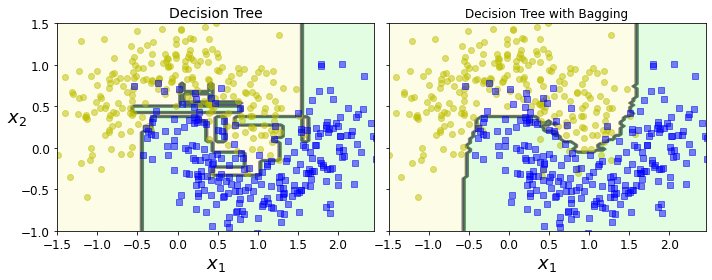

In [13]:
fig, axes = plt.subplots(ncols = 2, figsize=(10,4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf, X, y)
plt.title("Decision Tree", fontsize=14)
plt.sca(axes[1])
plot_decision_boundary(bag_clf, X, y)
plt.title("Decision Tree with Bagging")
plt.ylabel("")
save_fig("decision_tree_without_and_with_bagging_plot")
plt.show()

### oob 평가

In [14]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,max_samples=0.2, 
    bootstrap = True, oob_score=True, random_state=40)
bag_clf.fit(X_train, y_train)
bag_clf.oob_score_

0.9226666666666666

In [15]:
bag_clf.oob_decision_function_

array([[0.32374101, 0.67625899],
       [0.38292683, 0.61707317],
       [1.        , 0.        ],
       [0.0245098 , 0.9754902 ],
       [0.03631961, 0.96368039],
       [0.08838384, 0.91161616],
       [0.38287154, 0.61712846],
       [0.10344828, 0.89655172],
       [0.93350384, 0.06649616],
       [0.80582524, 0.19417476],
       [0.52098765, 0.47901235],
       [0.07142857, 0.92857143],
       [0.72488038, 0.27511962],
       [0.86215539, 0.13784461],
       [0.93719807, 0.06280193],
       [0.10152284, 0.89847716],
       [0.05011933, 0.94988067],
       [0.91375291, 0.08624709],
       [0.61124694, 0.38875306],
       [0.92251816, 0.07748184],
       [0.05897436, 0.94102564],
       [0.2175    , 0.7825    ],
       [0.87192118, 0.12807882],
       [0.97094431, 0.02905569],
       [0.94890511, 0.05109489],
       [0.00982801, 0.99017199],
       [0.91315136, 0.08684864],
       [0.99764706, 0.00235294],
       [0.04854369, 0.95145631],
       [0.74754902, 0.25245098],
       [0.